In [28]:
import pandas as pd

# Читання даних з завантаженого файлу
user_behavior_df = pd.read_csv('./user_behavior_dataset.csv')

# Виведення розмірів датасету і назв колонок
user_behavior_shape = user_behavior_df.shape
user_behavior_columns = user_behavior_df.columns.tolist()

user_behavior_shape, user_behavior_columns

((700, 11),
 ['User ID',
  'Device Model',
  'Operating System',
  'App Usage Time (min/day)',
  'Screen On Time (hours/day)',
  'Battery Drain (mAh/day)',
  'Number of Apps Installed',
  'Data Usage (MB/day)',
  'Age',
  'Gender',
  'User Behavior Class'])

In [29]:
# Перевірка на пропуски в датасеті
missing_values = user_behavior_df.isnull().sum()

missing_values

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

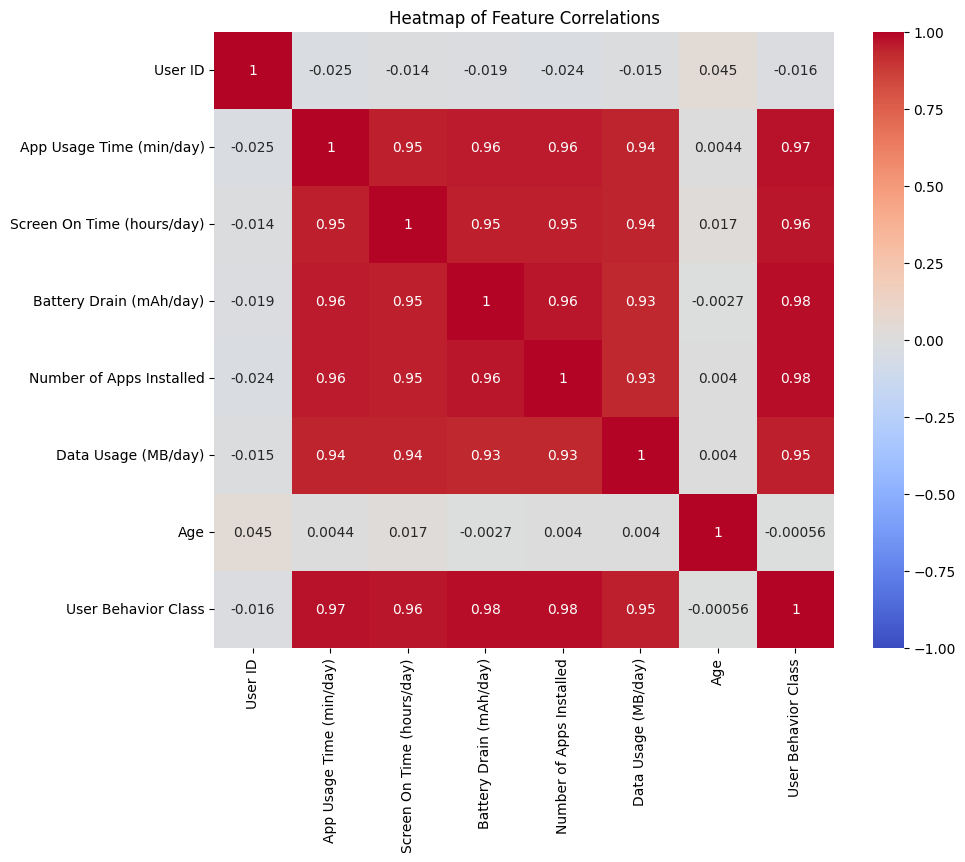

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Оскільки деякі колонки можуть бути категоріальними, залишимо тільки числові для кореляційного аналізу
numeric_df = user_behavior_df.select_dtypes(include=['float64', 'int64'])

# Кореляційна матриця для числових ознак
correlation_matrix = numeric_df.corr()

# Теплова карта кореляційної матриці
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap of Feature Correlations")
plt.show()

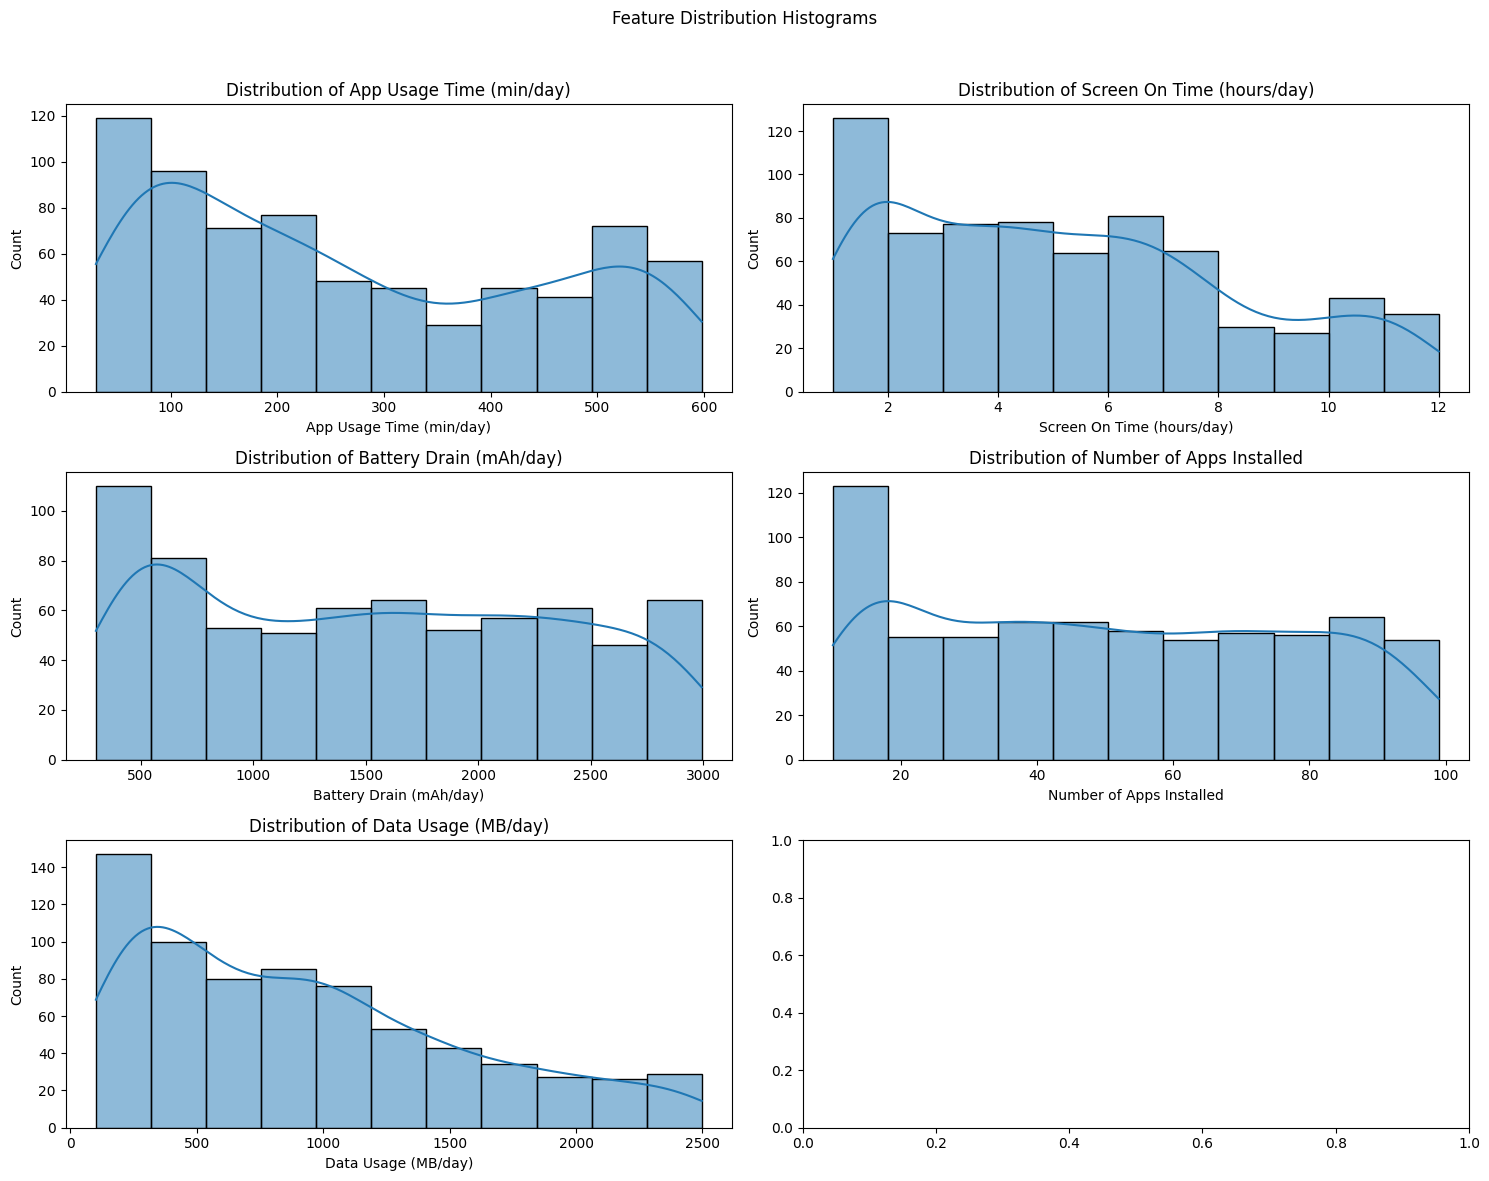

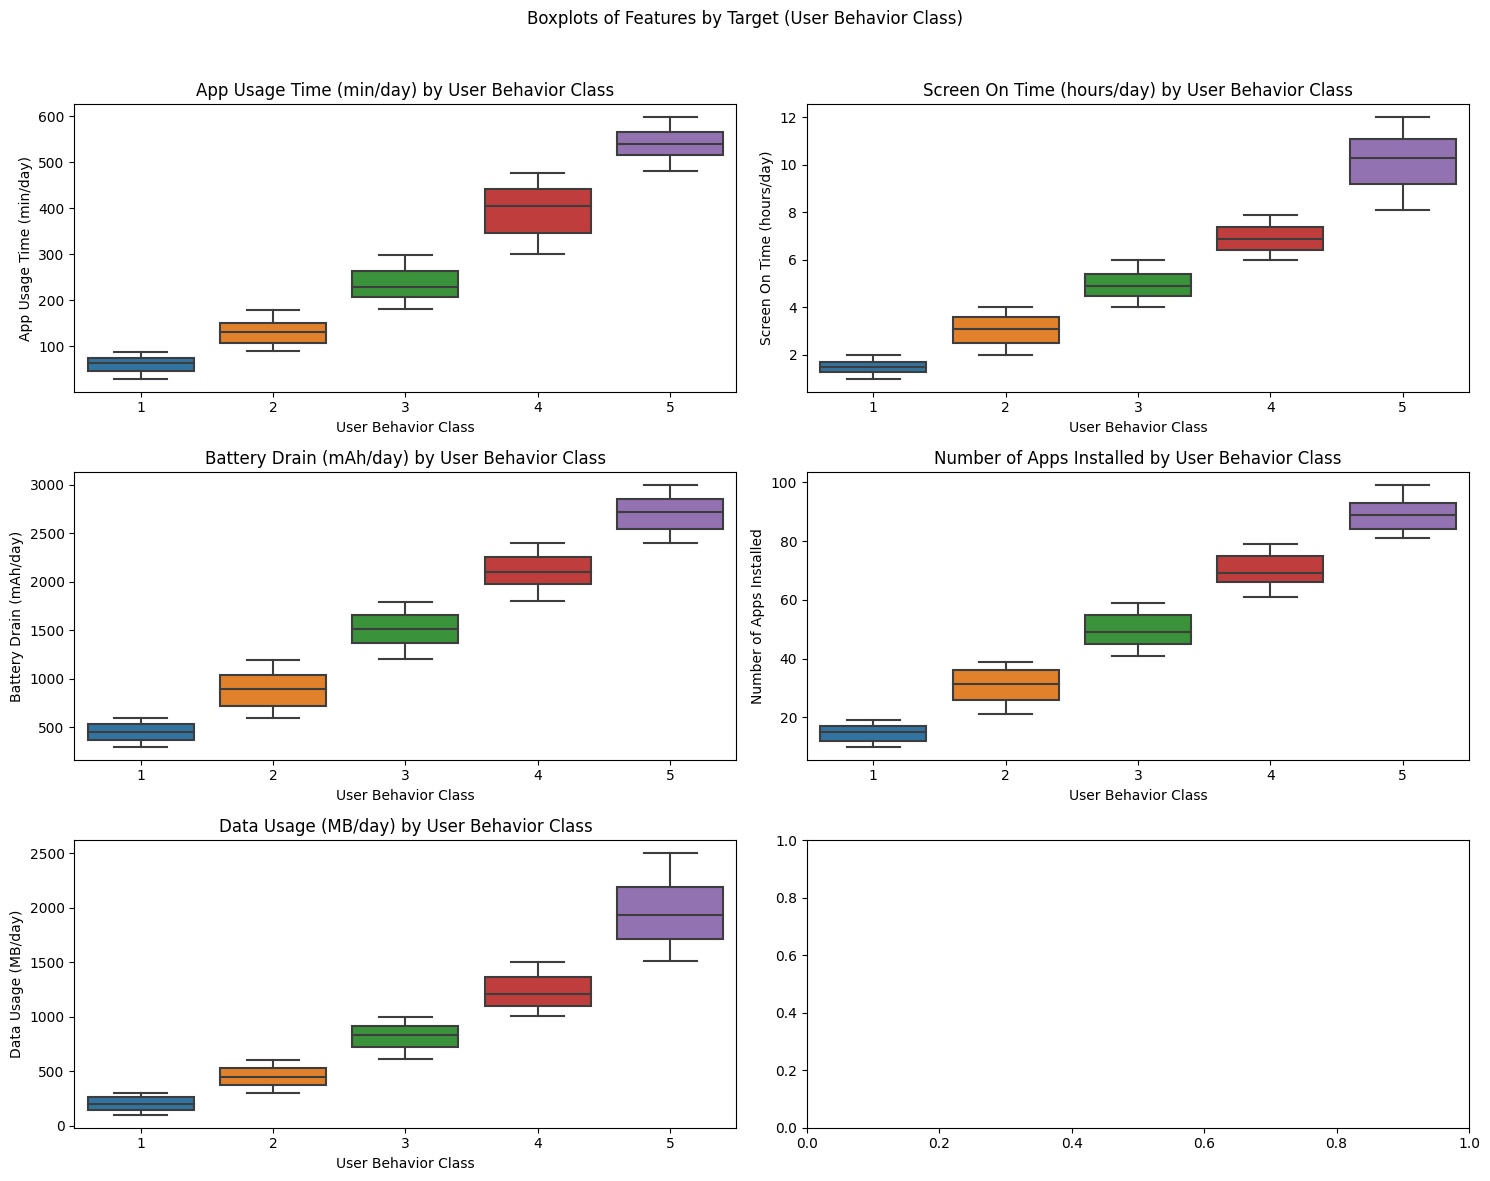

In [31]:
# Вибір декількох числових ознак для побудови гістограм і boxplots
selected_features = ["App Usage Time (min/day)", "Screen On Time (hours/day)", 
                     "Battery Drain (mAh/day)", "Number of Apps Installed", "Data Usage (MB/day)"]

# Гістограми розподілу обраних ознак
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Feature Distribution Histograms')

for i, feature in enumerate(selected_features):
    row, col = divmod(i, 2)
    sns.histplot(data=user_behavior_df, x=feature, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Boxplots для обраних ознак по відношенню до цільової змінної
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Boxplots of Features by Target (User Behavior Class)')

for i, feature in enumerate(selected_features):
    row, col = divmod(i, 2)
    sns.boxplot(data=user_behavior_df, x="User Behavior Class", y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by User Behavior Class')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler


# Вибираємо ознаки, які будемо нормалізувати
features_to_normalize = ["App Usage Time (min/day)", "Screen On Time (hours/day)", 
                         "Battery Drain (mAh/day)", "Number of Apps Installed", 
                         "Data Usage (MB/day)", "Age"]
scaler = StandardScaler()

# Нормалізація обраних ознак
user_behavior_df[features_to_normalize] = scaler.fit_transform(user_behavior_df[features_to_normalize])

# Перевірка результату нормалізації (перші кілька рядків)
user_behavior_df[features_to_normalize].head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383
1,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506
2,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989
3,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682
4,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Підготовка даних для навчання
X = user_behavior_df.drop(columns=['User ID', 'Device Model', 'Operating System', 'Gender', 'User Behavior Class'])
y = user_behavior_df['User Behavior Class']

# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Налаштування і навчання kNN
knn = KNeighborsClassifier(n_neighbors=3)  # Вибираємо k=5 як початкове значення
knn.fit(X_train, y_train)

# Оцінка на тестовому наборі
knn_predictions = knn.predict(X_test)  # Додаємо передбачення на тестовому наборі
knn_report_dict = classification_report(y_test, knn_predictions, output_dict=True)
knn_report_df = pd.DataFrame(knn_report_dict).transpose()
knn_report_df

,precision,recall,f1-score,support
1,1.0,1.0,1.0,46.0
2,1.0,1.0,1.0,34.0
3,1.0,1.0,1.0,50.0
4,1.0,1.0,1.0,47.0
5,1.0,1.0,1.0,33.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,210.0
weighted avg,1.0,1.0,1.0,210.0


In [34]:
from sklearn.tree import DecisionTreeClassifier

# Налаштування і навчання Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Оцінка на тестовому наборі
dt_predictions = dt.predict(X_test)
dt_report_dict = classification_report(y_test, dt_predictions, output_dict=True)
dt_report_df = pd.DataFrame(dt_report_dict).transpose()
dt_report_df


,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,46.000000
2,1.000000,1.000000,1.000000,34.000000
3,1.000000,1.000000,1.000000,50.000000
4,1.000000,0.978723,0.989247,47.000000
5,0.970588,1.000000,0.985075,33.000000
accuracy,0.995238,0.995238,0.995238,0.995238
macro avg,0.994118,0.995745,0.994864,210.000000
weighted avg,0.995378,0.995238,0.995248,210.000000


In [35]:
from sklearn.svm import SVC

# Налаштування і навчання SVM
svm = SVC(C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Оцінка на тестовому наборі
svm_predictions = svm.predict(X_test)
svm_report_dict = classification_report(y_test, svm_predictions, output_dict=True)
svm_report_df = pd.DataFrame(svm_report_dict).transpose()

svm_report_df


,precision,recall,f1-score,support
1,1.0,1.0,1.0,46.0
2,1.0,1.0,1.0,34.0
3,1.0,1.0,1.0,50.0
4,1.0,1.0,1.0,47.0
5,1.0,1.0,1.0,33.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,210.0
weighted avg,1.0,1.0,1.0,210.0


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Налаштування і навчання Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Оцінка на тестовому наборі
rf_predictions = rf.predict(X_test)
rf_report_dict = classification_report(y_test, rf_predictions, output_dict=True)
rf_report_df = pd.DataFrame(rf_report_dict).transpose()
rf_report_df

,precision,recall,f1-score,support
1,1.0,1.0,1.0,46.0
2,1.0,1.0,1.0,34.0
3,1.0,1.0,1.0,50.0
4,1.0,1.0,1.0,47.0
5,1.0,1.0,1.0,33.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,210.0
weighted avg,1.0,1.0,1.0,210.0


In [37]:
from sklearn.ensemble import AdaBoostClassifier

# Налаштування і навчання AdaBoost
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Оцінка на тестовому наборі
ada_predictions = ada.predict(X_test)
ada_report_dict = classification_report(y_test, ada_predictions, output_dict=True)
ada_report_df = pd.DataFrame(ada_report_dict).transpose()

ada_report_df

c:\Users\aserbs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aserbs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aserbs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aserbs\AppD

,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,46.000000
2,0.259542,1.000000,0.412121,34.000000
3,0.000000,0.000000,0.000000,50.000000
4,0.000000,0.000000,0.000000,47.000000
5,1.000000,1.000000,1.000000,33.000000
accuracy,0.538095,0.538095,0.538095,0.538095
macro avg,0.451908,0.600000,0.482424,210.000000
weighted avg,0.418212,0.538095,0.442915,210.000000


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Використання GridSearchCV для підбору оптимальних параметрів C і gamma для SVM
svm_params = {
    'C': [0.1, 1, 10, 100],  # Регуляризаційний параметр
    'gamma': [1, 0.1, 0.01, 0.001]  # Вплив окремих зразків
}

# Налаштування та запуск GridSearchCV
svm_grid_search = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid_search.fit(X_train, y_train)

# Отримання найкращих параметрів
best_svm = svm_grid_search.best_estimator_
best_svm_params = svm_grid_search.best_params_

# Оцінка на тестовому наборі з оптимальними параметрами
svm_best_predictions = best_svm.predict(X_test)
svm_best_report = classification_report(y_test, svm_best_predictions, output_dict=True)  # Додаємо output_dict=True
svm_best_report_df = pd.DataFrame(svm_best_report).transpose()
svm_best_confusion_matrix = confusion_matrix(y_test, svm_best_predictions)

(best_svm_params, svm_best_report_df, svm_best_confusion_matrix)

({'C': 0.1, 'gamma': 1},
               precision  recall  f1-score  support
 1                   1.0     1.0       1.0     46.0
 2                   1.0     1.0       1.0     34.0
 3                   1.0     1.0       1.0     50.0
 4                   1.0     1.0       1.0     47.0
 5                   1.0     1.0       1.0     33.0
 accuracy            1.0     1.0       1.0      1.0
 macro avg           1.0     1.0       1.0    210.0
 weighted avg        1.0     1.0       1.0    210.0,
 array([[46,  0,  0,  0,  0],
        [ 0, 34,  0,  0,  0],
        [ 0,  0, 50,  0,  0],
        [ 0,  0,  0, 47,  0],
        [ 0,  0,  0,  0, 33]], dtype=int64))

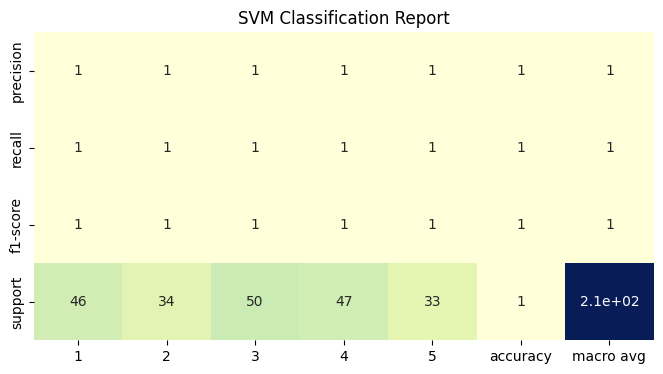

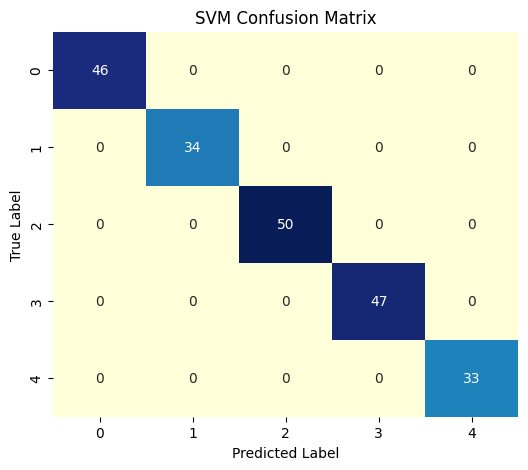

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(svm_best_report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", cbar=False)
plt.title("SVM Classification Report")
plt.show()

# Візуалізація матриці невідповідностей (confusion_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(svm_best_confusion_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=True, yticklabels=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()